# Capstone 3: Customer Segmentation
### Develop a deep learning model to predict the outcome of bank marketing campaigns.
- Use TensorFlow to build a model with only Dense, Dropout, and Batch Normalization layers.
- Achieve model accuracy above 70%.
- Monitor training loss and accuracy using TensorBoard.
- Modularize your code with classes for repeated functions.

In [56]:
import os
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [57]:
df = pd.read_csv('train.csv')

In [58]:
# inspect data
df.keys()

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

In [59]:
# Load and preprocess the data
class BankMarketingData:
    def __init__(self, df):
        self.data = pd.read_csv('train.csv')

In [60]:
dataset_train = pd.read_csv('train.csv')
dataset_train.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,31028.0,40.439216,10.751392,18.0,32.0,39.0,48.00,97.0
balance,31248.0,1368.112615,3085.342417,-8020.0,72.0,449.0,1413.00,102128.0
day_of_month,31647.0,15.818561,8.322970,1.0,8.0,16.0,21.00,31.0
last_contact_duration,31336.0,256.184038,256.181479,0.0,103.0,179.0,315.25,4900.0
num_contacts_in_campaign,31535.0,2.776629,3.153293,1.0,1.0,2.0,3.00,63.0
days_since_prev_campaign_contact,5816.0,224.995186,114.991828,1.0,133.0,195.0,329.00,871.0
num_contacts_prev_campaign,31647.0,0.591620,2.499675,0.0,0.0,0.0,0.00,275.0
term_deposit_subscribed,31647.0,0.107246,0.309430,0.0,0.0,0.0,0.00,1.0


In [63]:
training_set = dataset_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[28.]
 [34.]
 [46.]
 ...
 [41.]
 [48.]
 [38.]]
(31647, 1)


In [64]:
print("rows : "+str(df.shape[0]))
print(df.dtypes)

rows : 31647
id                                   object
customer_age                        float64
job_type                             object
marital                              object
education                            object
default                              object
balance                             float64
housing_loan                         object
personal_loan                        object
communication_type                   object
day_of_month                          int64
month                                object
last_contact_duration               float64
num_contacts_in_campaign            float64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign            int64
prev_campaign_outcome                object
term_deposit_subscribed               int64
dtype: object


In [65]:
data = df.copy()
df = df.drop(['last_contact_duration'], axis=1)

In [66]:
# data cleaning"
df.isnull().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

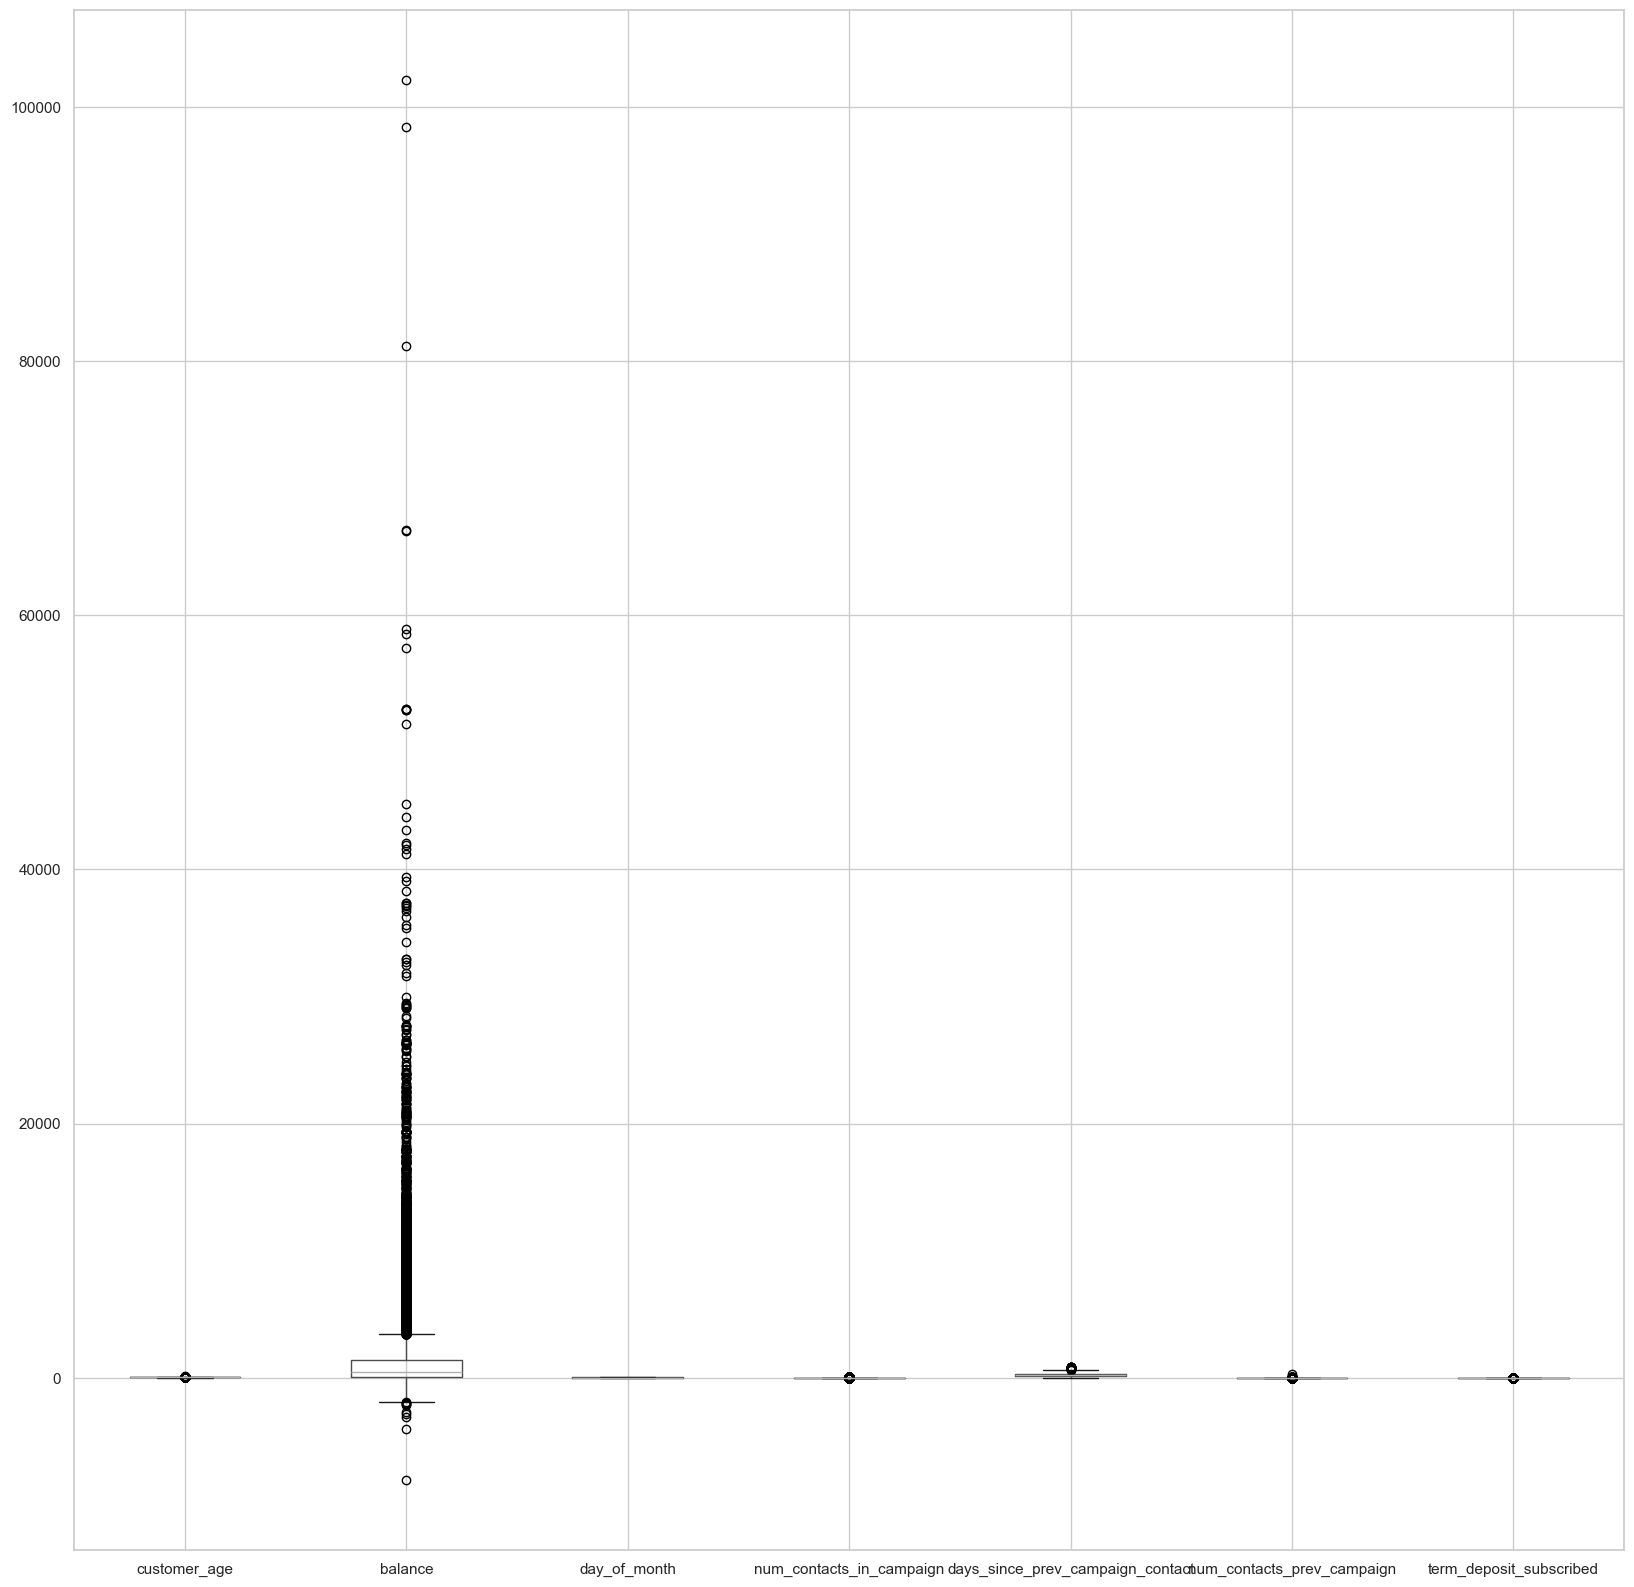

In [67]:
# Box plot
df.boxplot(figsize=(20, 20))
plt.show()

In [68]:
df.drop(columns=['id'], inplace=True)

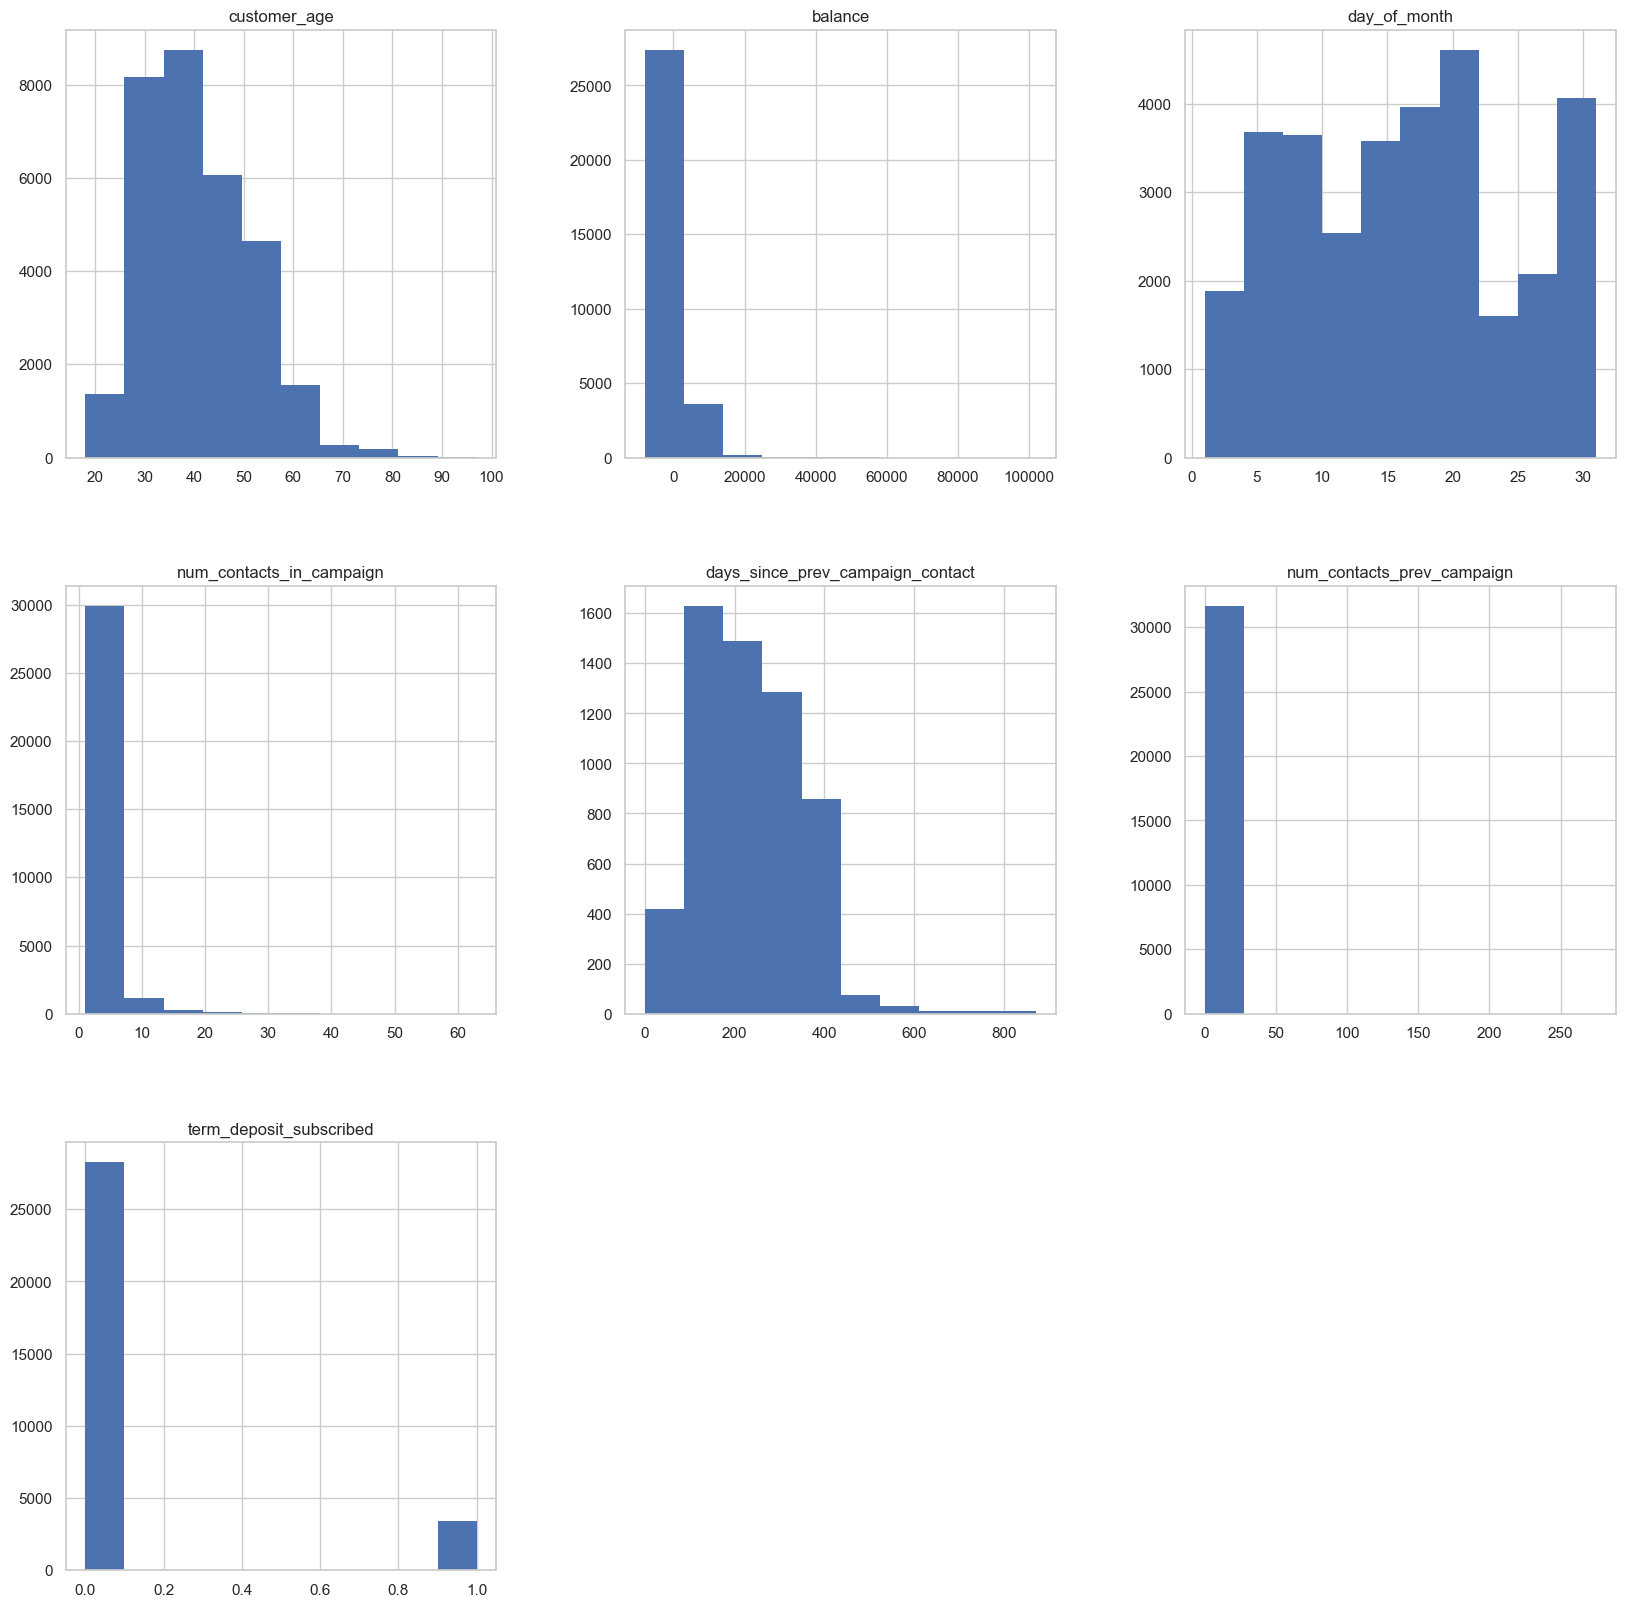

In [69]:
df.hist(figsize=(20,20), edgecolor='black')
plt.show()

In [70]:
df.isnull().sum()

customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [71]:
df = df.drop(columns='days_since_prev_campaign_contact')

In [72]:
df.isnull().sum()

customer_age                  619
job_type                        0
marital                       150
education                       0
default                         0
balance                       399
housing_loan                    0
personal_loan                 149
communication_type              0
day_of_month                    0
month                           0
num_contacts_in_campaign      112
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [73]:
# drop the duplicates
dups = df.duplicated()
print('before are there any duplicates : ', dups.any())
df.drop_duplicates(inplace=True)
# reset indices after dropping rows
df=df.reset_index(drop=True)
print('after are there any duplicates : ', df.duplicated().any())

before are there any duplicates :  True
after are there any duplicates :  False


In [74]:
# Check if the column exists before filling null values
if 'last_contact_duration' in df.columns:
    df['customer_age'].fillna(df['customer_age'].mean(), inplace=True)
    df['marital'].fillna('Unknown', inplace=True)
    df['balance'].fillna(df['balance'].median(), inplace=True)
    df['personal_loan'].fillna('Unknown', inplace=True)
    df['last_contact_duration'].fillna(df['last_contact_duration'].median(), inplace=True)
    df['num_contacts_in_campaign'].fillna(df['num_contacts_in_campaign'].median(), inplace=True)
else:
    print("Column 'last_contact_duration' does not exist in the DataFrame.")


Column 'last_contact_duration' does not exist in the DataFrame.


In [75]:
# Check for the correct column names
print(df.columns)  # Check all column names in your DataFrame

# Example: If 'last_contact_duration' is not present, handle the available columns
if 'customer_age' in df.columns:
    df['customer_age'].fillna(df['customer_age'].mean(), inplace=True)
if 'marital' in df.columns:
    df['marital'].fillna('Unknown', inplace=True)
# Handle other columns similarly based on their availability
# ...
else:
    print("Column 'last_contact_duration' (or other relevant columns) not found.")


Index(['customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'num_contacts_in_campaign',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')


In [76]:
df.isnull().sum()

customer_age                    0
job_type                        0
marital                         0
education                       0
default                         0
balance                       399
housing_loan                    0
personal_loan                 149
communication_type              0
day_of_month                    0
month                           0
num_contacts_in_campaign      112
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [77]:
df['customer_age'].fillna(df['customer_age'].mean(), inplace=True)
df['marital'].fillna('Unknown', inplace=True)
df['balance'].fillna(df['balance'].median(), inplace=True)
df['personal_loan'].fillna('Unknown', inplace=True)
#df['last_contact_duration'].fillna(df['last_contact_duration'].median(), inplace=True)
df['num_contacts_in_campaign'].fillna(df['num_contacts_in_campaign'].median(), inplace=True)

In [78]:
df.duplicated().sum()

0

In [79]:
# Specify columns to visualize
cols = ['customer_age', 'balance', 'day_of_month', 'num_contacts_in_campaign', 'num_contacts_prev_campaign']
df[cols]

,customer_age,balance,day_of_month,num_contacts_in_campaign,num_contacts_prev_campaign
0,28.0,285.0,26,4.0,0
1,34.0,934.0,18,2.0,1
2,46.0,656.0,5,4.0,0
3,34.0,2.0,20,3.0,0
4,41.0,1352.0,13,2.0,0
...,...,...,...,...,...
31641,58.0,567.0,2,2.0,3
31642,51.0,1072.0,20,7.0,0
31643,41.0,242.0,23,2.0,0
31644,48.0,2699.0,11,6.0,0


In [80]:
cat_cols = list(df.drop(columns=cols).columns)
 
df[cat_cols] = df[cat_cols].fillna(method='ffill', axis=0)
 
df.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_19244\366433630.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[cat_cols] = df[cat_cols].fillna(method='ffill', axis=0)


customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
dtype: int64

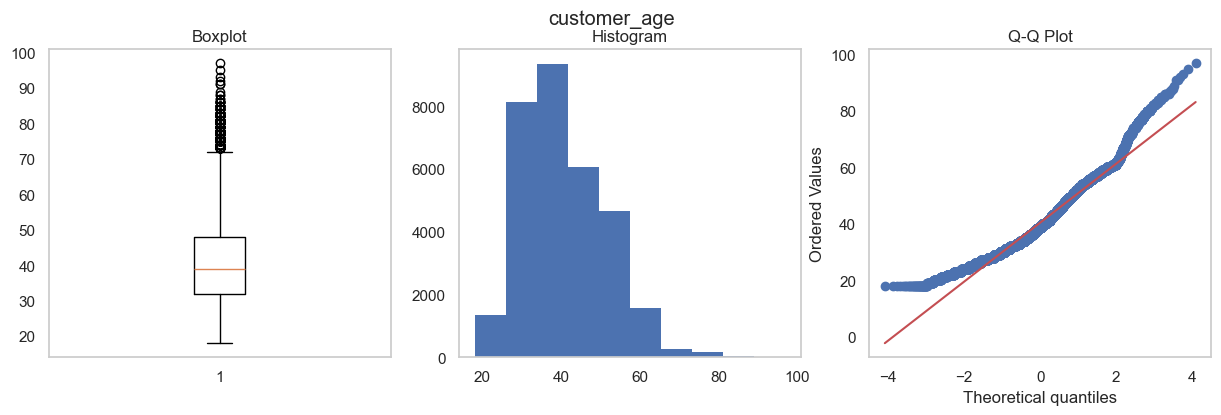

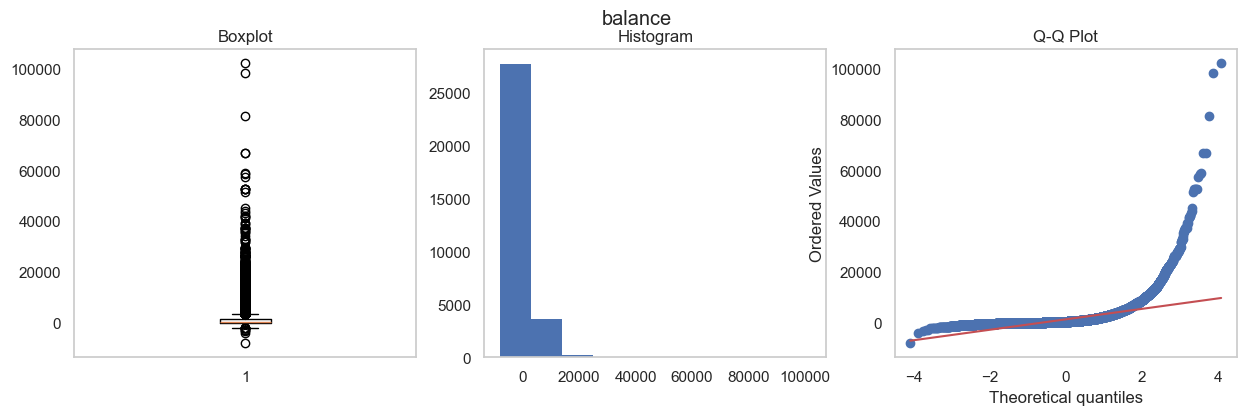

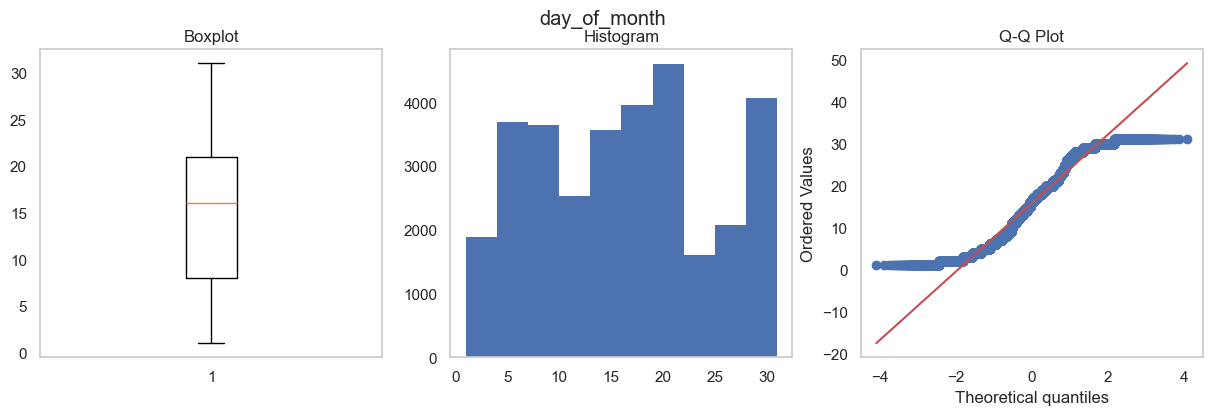

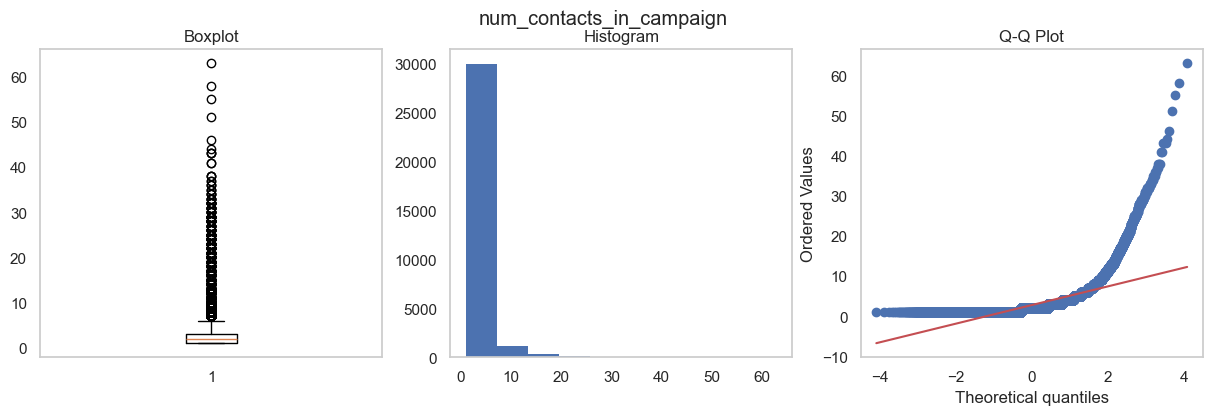

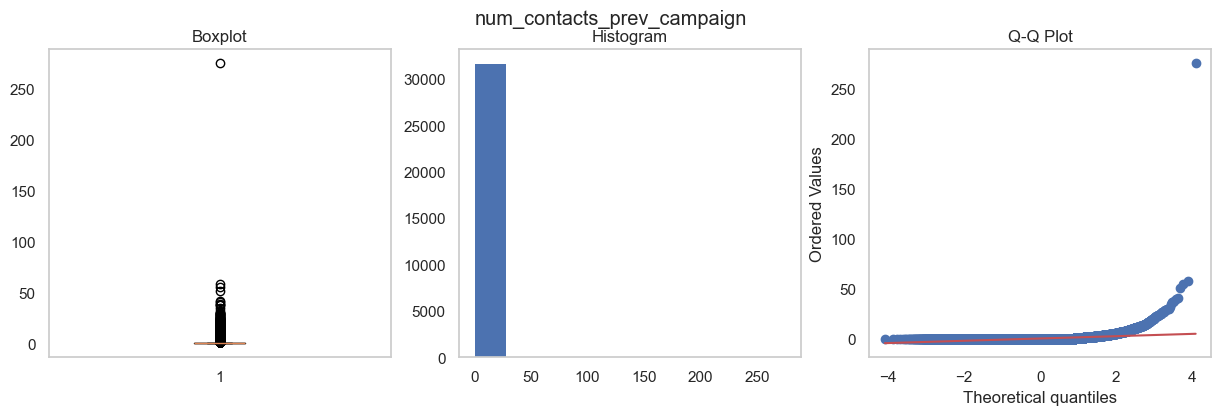

In [81]:
for col in cols:
    if df[col].dtype in ['int64', 'float64']:  # Check if the column contains numeric data
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
        fig.suptitle(col)
        
        # Boxplot
        axes[0].boxplot(df[col])
        axes[0].set_title('Boxplot')
        
        # Histogram
        axes[1].hist(df[col])
        axes[1].set_title('Histogram')
        
        # Q-Q plot
        stats.probplot(df[col], dist='norm', plot=axes[2])
        axes[2].set_title('Q-Q Plot')
        
        plt.show()
    else:
        print(f"Column '{col}' is not numeric and cannot be visualized.")


Before Shape: (31646, 15)
After Shape: (31642, 15)


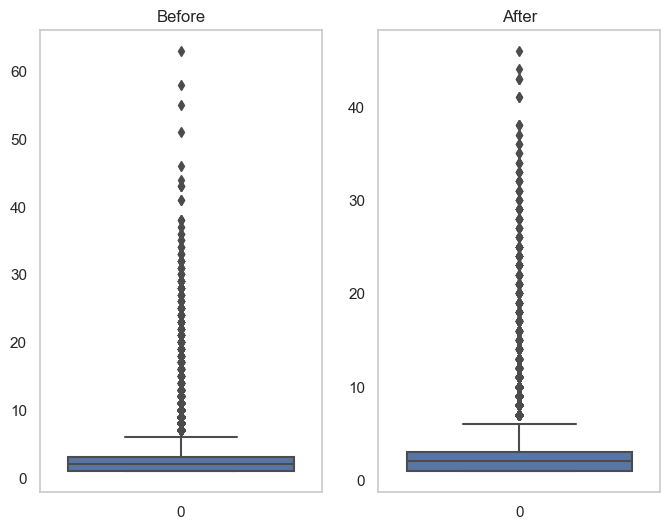

In [82]:
# remove outlier of campaign
fig, axes = plt.subplots(1,2)
df2 = df
col='num_contacts_in_campaign'
print("Before Shape:",df2.shape)
axes[0].title.set_text("Before")
sns.boxplot(df2[col],orient='v',ax=axes[0])
# Removing campaign above 50 
df2 = df2[ (df2[col]<50)]
print("After Shape:",df2.shape)
axes[1].title.set_text("After")
sns.boxplot(df2[col],orient='v',ax=axes[1])
df=df2;
plt.show()
# reset indices after dropping rows
df=df.reset_index(drop=True)

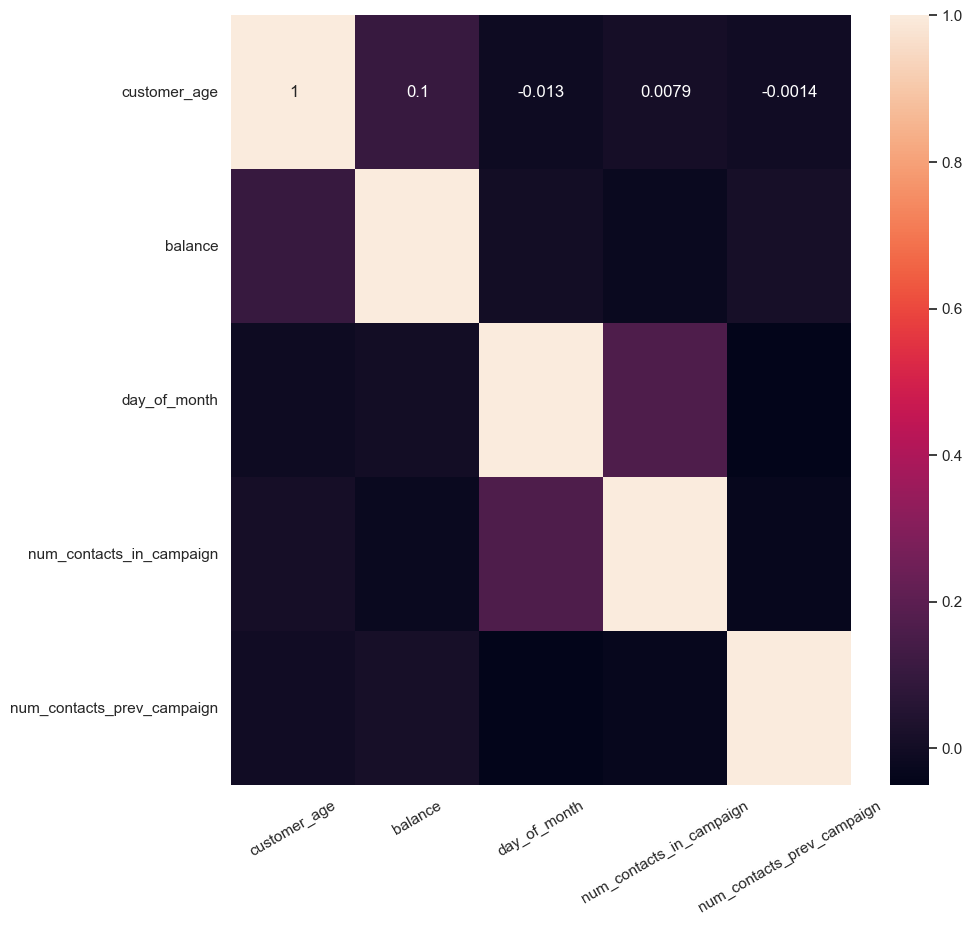

In [83]:
# Correlation
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
sns.heatmap(df[cols].corr(),
            annot=True,
            ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

In [84]:
df.describe()

,customer_age,balance,day_of_month,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000
mean,40.440233,1356.423867,15.817869,2.767019,0.591714,0.107262
std,10.645743,3067.455540,8.323432,3.088839,2.499862,0.309452
min,18.000000,-8020.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,75.000000,8.000000,1.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,2.000000,0.000000,0.000000
75%,48.000000,1394.000000,21.000000,3.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,46.000000,275.000000,1.000000


In [85]:
numerical_df = df.select_dtypes(include=['float64','int64'])
numerical_df.head()

,customer_age,balance,day_of_month,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
0,28.0,285.0,26,4.0,0,0
1,34.0,934.0,18,2.0,1,0
2,46.0,656.0,5,4.0,0,0
3,34.0,2.0,20,3.0,0,0
4,41.0,1352.0,13,2.0,0,0


In [86]:
categorical_df=df.select_dtypes(include='object')
categorical_df.head()

,job_type,marital,education,default,housing_loan,personal_loan,communication_type,month,prev_campaign_outcome
0,management,single,tertiary,no,yes,no,unknown,jun,unknown
1,blue-collar,married,secondary,no,no,yes,cellular,nov,other
2,technician,married,secondary,no,no,no,cellular,feb,unknown
3,services,single,secondary,no,yes,no,unknown,may,unknown
4,blue-collar,married,primary,no,yes,no,cellular,may,unknown


In [87]:
def count_plot(df,feature):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig = plt.subplots(figsize=(10,3))
    sns.countplot(x=feature, data=df, color = 'yellow') # countplot
    plt.show()

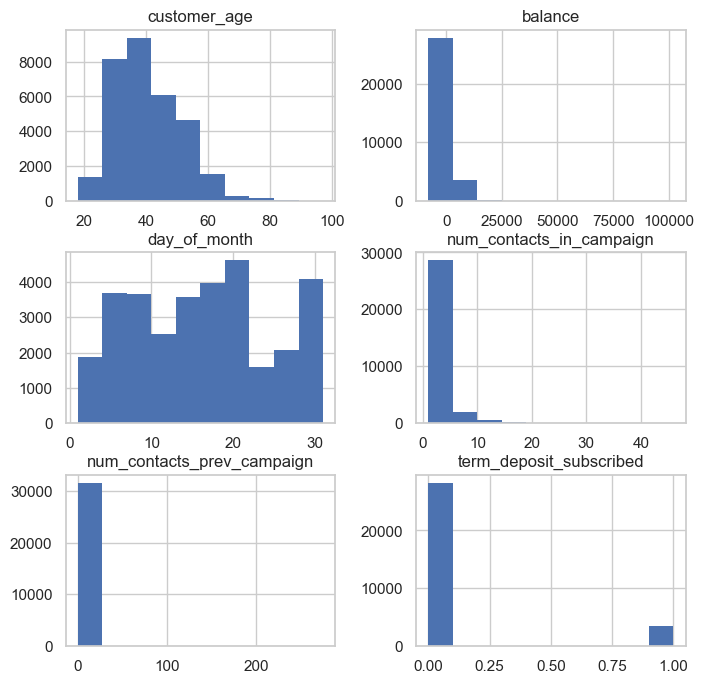

In [88]:
df.hist(figsize=(8,8), edgecolor='black')
plt.show()

c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


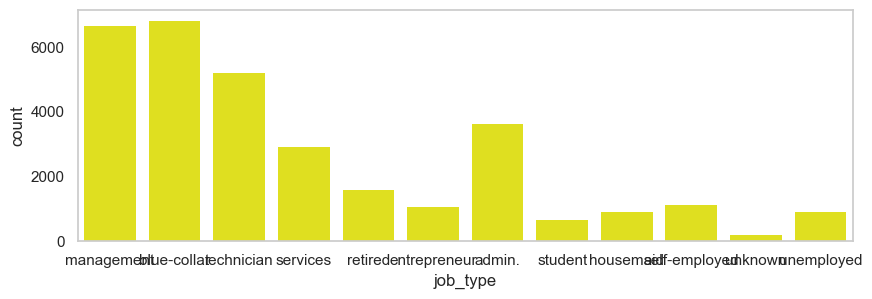

c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


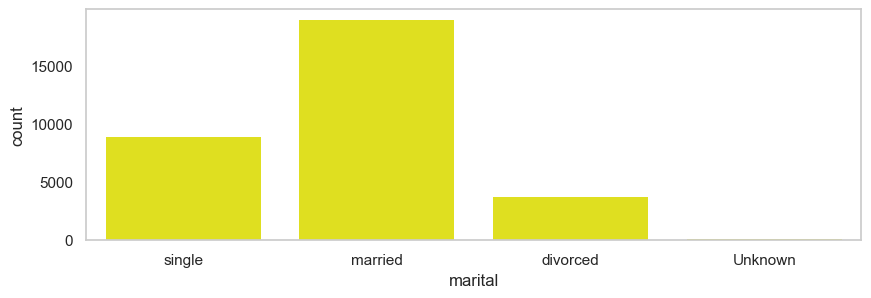

c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


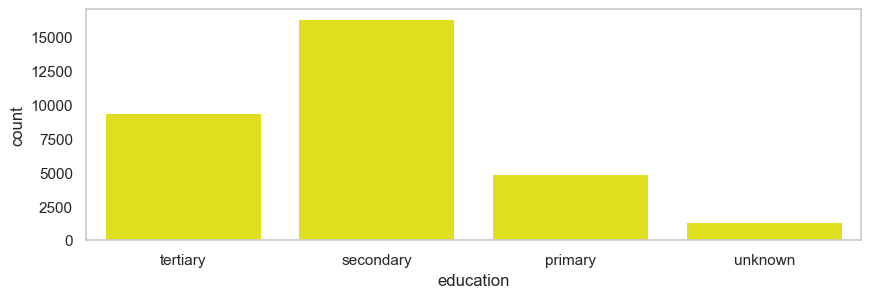

c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


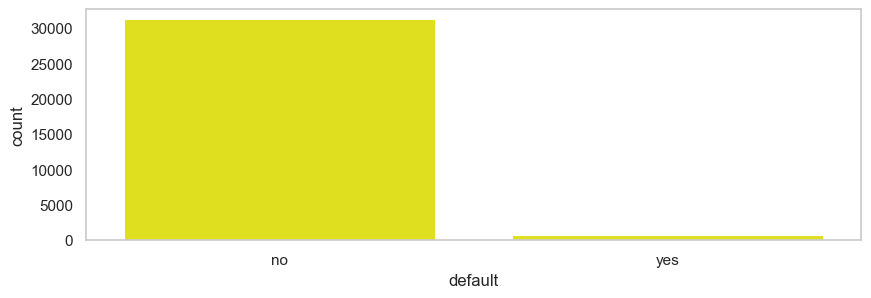

c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


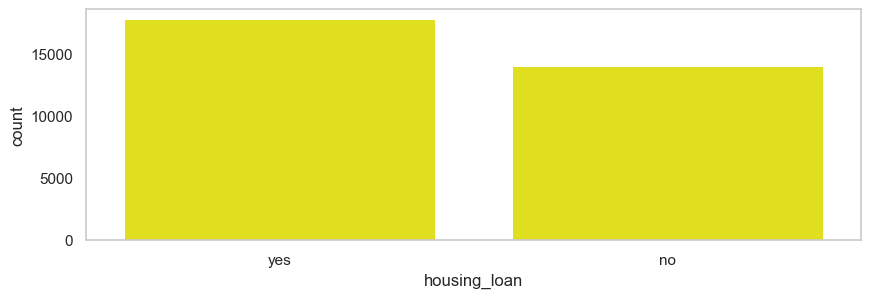

c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


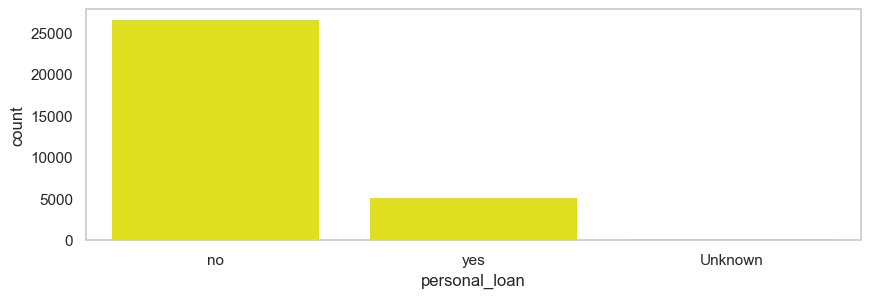

In [89]:
for cat_col in categorical_df.columns:
    if cat_col in ['job_type','marital','education', 'default','housing_loan','personal_loan']:
        count_plot(df,cat_col)

In [90]:
# Preprocessing
oe = OrdinalEncoder()
df[cat_cols[0: -1]] = oe.fit_transform(df[cat_cols[0: -1]])
df

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,4.0,3.0,2.0,0.0,285.0,1.0,1.0,2.0,26,6.0,4.0,0,3.0,0
1,34.0,1.0,2.0,1.0,0.0,934.0,0.0,2.0,0.0,18,9.0,2.0,1,1.0,0
2,46.0,9.0,2.0,1.0,0.0,656.0,0.0,1.0,0.0,5,3.0,4.0,0,3.0,0
3,34.0,7.0,3.0,1.0,0.0,2.0,1.0,1.0,2.0,20,8.0,3.0,0,3.0,0
4,41.0,1.0,2.0,0.0,0.0,1352.0,1.0,1.0,0.0,13,8.0,2.0,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31637,58.0,0.0,2.0,1.0,0.0,567.0,1.0,1.0,0.0,2,3.0,2.0,3,1.0,0
31638,51.0,4.0,2.0,2.0,0.0,1072.0,0.0,1.0,2.0,20,6.0,7.0,0,3.0,0
31639,41.0,10.0,2.0,0.0,0.0,242.0,1.0,1.0,2.0,23,8.0,2.0,0,3.0,0
31640,48.0,7.0,2.0,1.0,0.0,2699.0,0.0,1.0,0.0,11,1.0,6.0,0,3.0,0


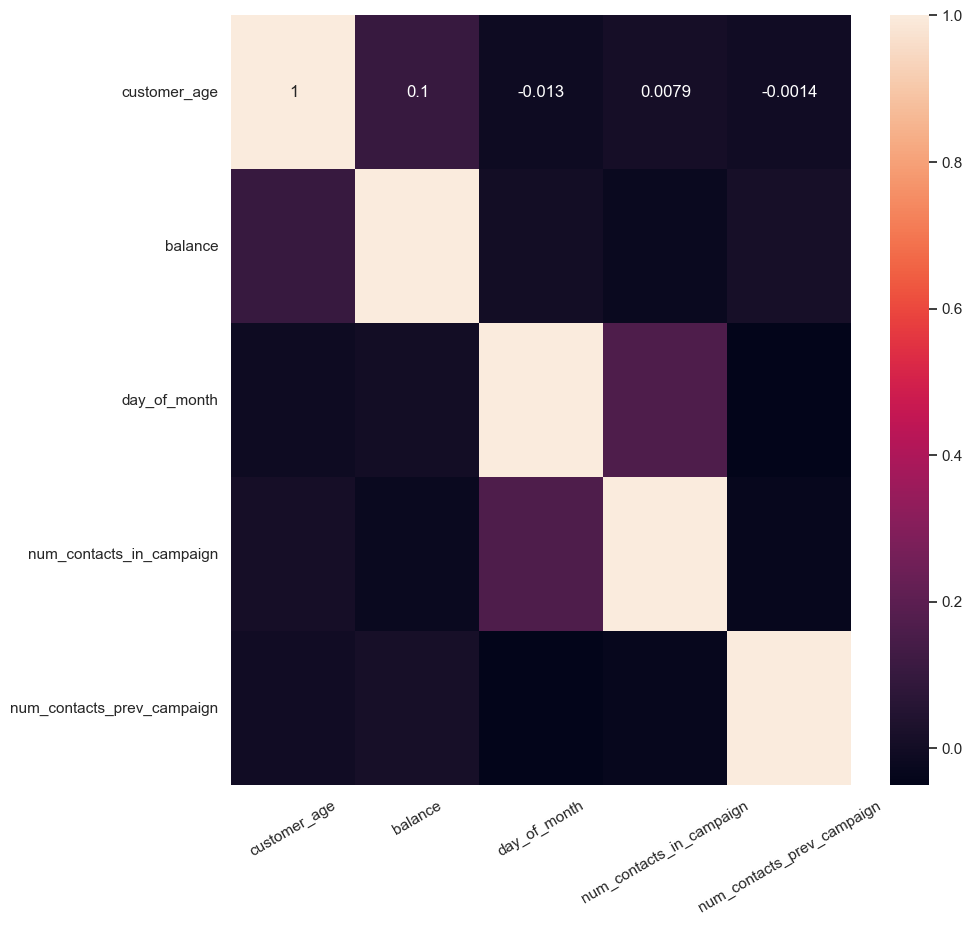

In [91]:
# Correlation
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
sns.heatmap(df[cols].corr(),
            annot=True,
            ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

In [92]:
df.describe()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
count,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000,31642.000000
mean,40.440233,4.322356,2.153688,1.224859,0.017477,1356.423867,0.559257,1.154415,0.641868,15.817869,5.532425,2.767019,0.591714,2.556602,0.107262
std,10.645743,3.262171,0.626007,0.747278,0.131042,3067.455540,0.496484,0.374157,0.898919,8.323432,3.012942,3.088839,2.499862,0.992770,0.309452
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8020.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,2.000000,1.000000,0.000000,75.000000,0.000000,1.000000,0.000000,8.000000,3.000000,1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,2.000000,1.000000,0.000000,449.000000,1.000000,1.000000,0.000000,16.000000,6.000000,2.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,3.000000,2.000000,0.000000,1394.000000,1.000000,1.000000,2.000000,21.000000,8.000000,3.000000,0.000000,3.000000,0.000000
max,97.000000,11.000000,3.000000,3.000000,1.000000,102128.000000,1.000000,2.000000,2.000000,31.000000,11.000000,46.000000,275.000000,3.000000,1.000000


In [93]:
numerical_df = df.select_dtypes(include=['float64','int64'])
numerical_df.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,4.0,3.0,2.0,0.0,285.0,1.0,1.0,2.0,26,6.0,4.0,0,3.0,0
1,34.0,1.0,2.0,1.0,0.0,934.0,0.0,2.0,0.0,18,9.0,2.0,1,1.0,0
2,46.0,9.0,2.0,1.0,0.0,656.0,0.0,1.0,0.0,5,3.0,4.0,0,3.0,0
3,34.0,7.0,3.0,1.0,0.0,2.0,1.0,1.0,2.0,20,8.0,3.0,0,3.0,0
4,41.0,1.0,2.0,0.0,0.0,1352.0,1.0,1.0,0.0,13,8.0,2.0,0,3.0,0


In [94]:
categorical_df=df.select_dtypes(include='object')
categorical_df.head()

""
0
1
2
3
4


In [95]:
def count_plot(df,feature):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig = plt.subplots(figsize=(10,10))
    sns.countplot(x=feature, data=df, color = 'yellow') # countplot
    plt.show()

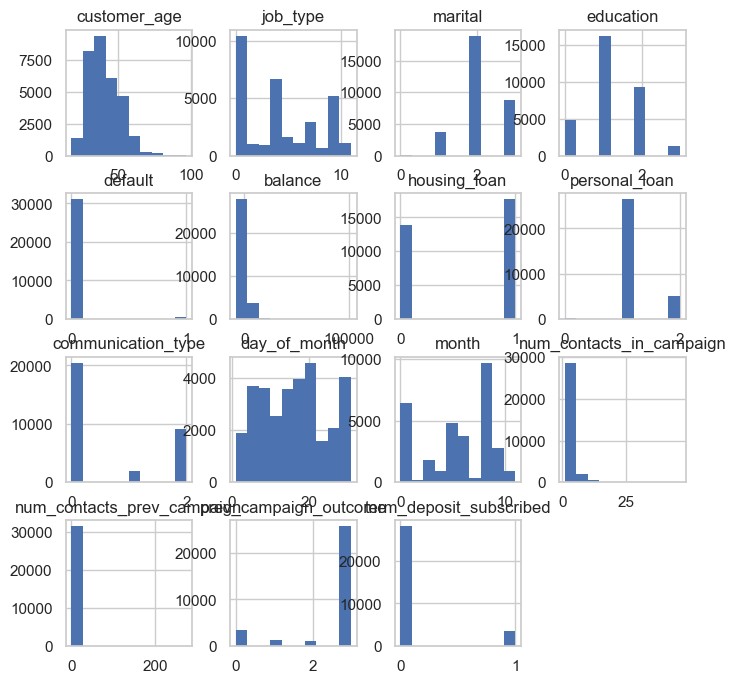

In [96]:
df.hist(figsize=(8,8), edgecolor='black')
plt.show()

In [97]:
for cat_col in categorical_df.columns:
    if cat_col in ['job_type','marital','education', 'default','housing_loan','personal_loan']:
        count_plot(df,cat_col)

In [98]:
# Preprocessing
oe = OrdinalEncoder()
df[cat_cols[0: -1]] = oe.fit_transform(df[cat_cols[0: -1]])
df

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,4.0,3.0,2.0,0.0,285.0,1.0,1.0,2.0,26,6.0,4.0,0,3.0,0
1,34.0,1.0,2.0,1.0,0.0,934.0,0.0,2.0,0.0,18,9.0,2.0,1,1.0,0
2,46.0,9.0,2.0,1.0,0.0,656.0,0.0,1.0,0.0,5,3.0,4.0,0,3.0,0
3,34.0,7.0,3.0,1.0,0.0,2.0,1.0,1.0,2.0,20,8.0,3.0,0,3.0,0
4,41.0,1.0,2.0,0.0,0.0,1352.0,1.0,1.0,0.0,13,8.0,2.0,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31637,58.0,0.0,2.0,1.0,0.0,567.0,1.0,1.0,0.0,2,3.0,2.0,3,1.0,0
31638,51.0,4.0,2.0,2.0,0.0,1072.0,0.0,1.0,2.0,20,6.0,7.0,0,3.0,0
31639,41.0,10.0,2.0,0.0,0.0,242.0,1.0,1.0,2.0,23,8.0,2.0,0,3.0,0
31640,48.0,7.0,2.0,1.0,0.0,2699.0,0.0,1.0,0.0,11,1.0,6.0,0,3.0,0


In [99]:
oe.categories_

[array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 array([0., 1., 2., 3.]),
 array([0., 1., 2., 3.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1., 2.]),
 array([0., 1., 2.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 array([0., 1., 2., 3.])]

In [100]:
X = df.drop(columns='term_deposit_subscribed')
X

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,28.0,4.0,3.0,2.0,0.0,285.0,1.0,1.0,2.0,26,6.0,4.0,0,3.0
1,34.0,1.0,2.0,1.0,0.0,934.0,0.0,2.0,0.0,18,9.0,2.0,1,1.0
2,46.0,9.0,2.0,1.0,0.0,656.0,0.0,1.0,0.0,5,3.0,4.0,0,3.0
3,34.0,7.0,3.0,1.0,0.0,2.0,1.0,1.0,2.0,20,8.0,3.0,0,3.0
4,41.0,1.0,2.0,0.0,0.0,1352.0,1.0,1.0,0.0,13,8.0,2.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31637,58.0,0.0,2.0,1.0,0.0,567.0,1.0,1.0,0.0,2,3.0,2.0,3,1.0
31638,51.0,4.0,2.0,2.0,0.0,1072.0,0.0,1.0,2.0,20,6.0,7.0,0,3.0
31639,41.0,10.0,2.0,0.0,0.0,242.0,1.0,1.0,2.0,23,8.0,2.0,0,3.0
31640,48.0,7.0,2.0,1.0,0.0,2699.0,0.0,1.0,0.0,11,1.0,6.0,0,3.0


In [101]:
y = df[['term_deposit_subscribed']]
y

,term_deposit_subscribed
0,0
1,0
2,0
3,0
4,0
...,...
31637,0
31638,0
31639,0
31640,0


In [102]:
ohe = OneHotEncoder(sparse=False)
 
y_encoded = ohe.fit_transform(y)
y_encoded

c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=13)


In [104]:
# Create a Sequential model
model = Sequential()
 
# Add input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
 
# Add hidden layers
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
 
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
 
# Add output layer
model.add(Dense(y_train.shape[1], activation='softmax'))

In [105]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
 
# TensorBoard callback for logging training process
 
PATH = os.getcwd()
logpath = os.path.join(PATH, "tensorboard_log", datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard = TensorBoard(logpath)
 
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, tensorboard]
)

Epoch 1/50
396/396 [==============================] - 3s 6ms/step - loss: 0.5650 - accuracy: 0.8001 - val_loss: 0.3529 - val_accuracy: 0.8900
Epoch 2/50
396/396 [==============================] - 2s 5ms/step - loss: 0.3782 - accuracy: 0.8867 - val_loss: 0.3511 - val_accuracy: 0.8900
Epoch 3/50
396/396 [==============================] - 2s 6ms/step - loss: 0.3598 - accuracy: 0.8901 - val_loss: 0.3480 - val_accuracy: 0.8900
Epoch 4/50
396/396 [==============================] - 2s 6ms/step - loss: 0.3495 - accuracy: 0.8916 - val_loss: 0.3470 - val_accuracy: 0.8900
Epoch 5/50
396/396 [==============================] - 2s 6ms/step - loss: 0.3449 - accuracy: 0.8925 - val_loss: 0.3434 - val_accuracy: 0.8900
Epoch 6/50
396/396 [==============================] - 2s 6ms/step - loss: 0.3433 - accuracy: 0.8927 - val_loss: 0.3427 - val_accuracy: 0.8900
Epoch 7/50
396/396 [==============================] - 2s 6ms/step - loss: 0.3395 - accuracy: 0.8931 - val_loss: 0.3430 - val_accuracy: 0.8900
Epoch 

In [106]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                960       
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 128)              

In [107]:
plot_model(model, show_shapes=True, show_layer_names=(True))

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [108]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy*100:.2f}%")

  1/198 [..............................] - ETA: 5s - loss: 0.4676 - accuracy: 0.8125

198/198 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.8900
Test Loss: 0.3210, Test Accuracy: 89.00%


In [109]:
model.save(os.path.join('models','classify_v1.h5'))